In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('BankCreditCard.csv')
df.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

## Exploratory Data Analysis

Looking at the info of the data above, we immediately notice we do not need "Customer ID" column.  
Hence we will remove this column from the df.

In [4]:
df = df.drop("Customer ID", axis = 1)
df.shape

(30000, 24)

Secondly, we notice that it would make more sense to add common information columns together.  
That is, add Repayment Status from Jan to June and call it Repayment Status Total.  
Add Bill Amount from Jan to June and call it Bill Amount Total.  
Add Previous Payment from Jan to June and call it Previous Payment Total.

Below are 3 methods for adding the values of multiple columns.

In [5]:
# Method 1.
df["Repayment_Status_Total"] = df["Repayment_Status_Jan"]+df["Repayment_Status_Feb"]+df["Repayment_Status_March"]+df["Repayment_Status_April"]+df["Repayment_Status_May"]+df["Repayment_Status_June"]

Method 2 for adding multiple columns.

In [6]:
# Method 2
df["Bill_Amount_Total"] = df.iloc[:, 11:17].sum(axis=1)

Method 3 for adding multiple columns.

In [7]:
# Method 3
Previous_Payment_Total = ['Previous_Payment_Jan',
                          'Previous_Payment_Feb',
                          'Previous_Payment_March',
                          'Previous_Payment_April',
                          'Previous_Payment_May',
                          'Previous_Payment_June']
df["Previous_Payment_Total"] = df[Previous_Payment_Total].sum(axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Credit_Amount           30000 non-null  float64
 1   Gender                  30000 non-null  int64  
 2   Academic_Qualification  30000 non-null  int64  
 3   Marital                 30000 non-null  int64  
 4   Age_Years               30000 non-null  int64  
 5   Repayment_Status_Jan    30000 non-null  int64  
 6   Repayment_Status_Feb    30000 non-null  int64  
 7   Repayment_Status_March  30000 non-null  int64  
 8   Repayment_Status_April  30000 non-null  int64  
 9   Repayment_Status_May    30000 non-null  int64  
 10  Repayment_Status_June   30000 non-null  int64  
 11  Jan_Bill_Amount         30000 non-null  float64
 12  Feb_Bill_Amount         30000 non-null  float64
 13  March_Bill_Amount       30000 non-null  float64
 14  April_Bill_Amount       30000 non-null

Now, we can remove the original columns.

In [9]:
df.drop(df.iloc[:, 5:23], inplace = True, axis = 1) 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Credit_Amount           30000 non-null  float64
 1   Gender                  30000 non-null  int64  
 2   Academic_Qualification  30000 non-null  int64  
 3   Marital                 30000 non-null  int64  
 4   Age_Years               30000 non-null  int64  
 5   Default_Payment         30000 non-null  int64  
 6   Repayment_Status_Total  30000 non-null  int64  
 7   Bill_Amount_Total       30000 non-null  float64
 8   Previous_Payment_Total  30000 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 2.1 MB


In [11]:
df.describe().round()

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Default_Payment,Repayment_Status_Total,Bill_Amount_Total,Previous_Payment_Total
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,192917.0,2.0,2.0,2.0,35.0,0.0,2.0,326670.0,35193.0
std,132289.0,0.0,1.0,1.0,9.0,0.0,4.0,460365.0,72639.0
min,20000.0,1.0,1.0,0.0,21.0,0.0,0.0,-335168.0,0.0
25%,50000.0,1.0,1.0,1.0,28.0,0.0,0.0,34128.0,7600.0
50%,220000.0,2.0,2.0,2.0,34.0,0.0,0.0,150710.0,16031.0
75%,270000.0,2.0,2.0,2.0,41.0,0.0,2.0,353753.0,36411.0
max,2000000.0,2.0,6.0,3.0,79.0,1.0,30.0,5064815.0,4904190.0


As can be seen above, the range of Credit_Amount, Bill_Amount and Previous_Payment is significantly higher than the other variables.

In [12]:
df["Credit_Amount_mn"] = df.Credit_Amount/100000
df["Bill_Amount_mn"] = df.Bill_Amount_Total/100000
df["Previous_Payment_mn"] = df.Previous_Payment_Total/100000

In [13]:
df.describe().round()

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Default_Payment,Repayment_Status_Total,Bill_Amount_Total,Previous_Payment_Total,Credit_Amount_mn,Bill_Amount_mn,Previous_Payment_mn
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,192917.0,2.0,2.0,2.0,35.0,0.0,2.0,326670.0,35193.0,2.0,3.0,0.0
std,132289.0,0.0,1.0,1.0,9.0,0.0,4.0,460365.0,72639.0,1.0,5.0,1.0
min,20000.0,1.0,1.0,0.0,21.0,0.0,0.0,-335168.0,0.0,0.0,-3.0,0.0
25%,50000.0,1.0,1.0,1.0,28.0,0.0,0.0,34128.0,7600.0,0.0,0.0,0.0
50%,220000.0,2.0,2.0,2.0,34.0,0.0,0.0,150710.0,16031.0,2.0,2.0,0.0
75%,270000.0,2.0,2.0,2.0,41.0,0.0,2.0,353753.0,36411.0,3.0,4.0,0.0
max,2000000.0,2.0,6.0,3.0,79.0,1.0,30.0,5064815.0,4904190.0,20.0,51.0,49.0


In [14]:
cols = ["Credit_Amount","Bill_Amount_Total","Previous_Payment_Total"]
df.drop(cols, axis=1, inplace = True)

In [15]:
df.head()

,Gender,Academic_Qualification,Marital,Age_Years,Default_Payment,Repayment_Status_Total,Credit_Amount_mn,Bill_Amount_mn,Previous_Payment_mn
0,2,2,1,24,1,4,0.2,0.07725,0.00679
1,2,2,2,26,1,4,2.2,0.18088,0.06000
2,2,2,2,34,0,0,0.9,1.31663,0.12119
3,2,2,1,37,0,0,0.5,2.31344,0.09398
4,1,2,1,57,0,0,0.5,1.07259,0.60040


In [16]:
df.Default_Payment = df.Default_Payment.astype(str)

In [17]:
df.Default_Payment.replace({"1":"Yes","0":"No"}, inplace=True)

## Exploratory Data Analysis

<AxesSubplot:xlabel='Credit_Amount_mn', ylabel='Credit_Amount_mn'>

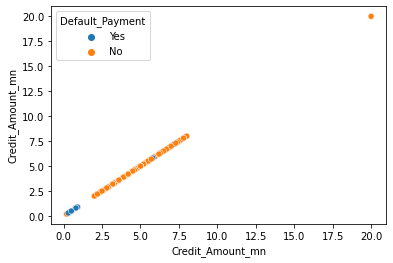

In [18]:
sns.scatterplot(data=df, x=df.Credit_Amount_mn, y=df.Credit_Amount_mn, hue=df.Default_Payment)

We notice an immediate pattern that Default Payment persists when Credit Amout is high.

<AxesSubplot:xlabel='Bill_Amount_mn', ylabel='Bill_Amount_mn'>

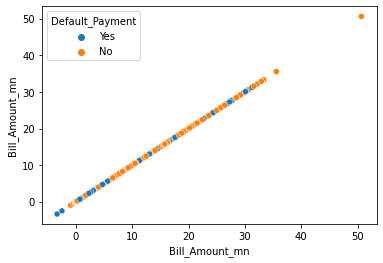

In [19]:
sns.scatterplot(data=df, x=df.Bill_Amount_mn, y=df.Bill_Amount_mn, hue=df.Default_Payment)

<AxesSubplot:xlabel='Previous_Payment_mn', ylabel='Previous_Payment_mn'>

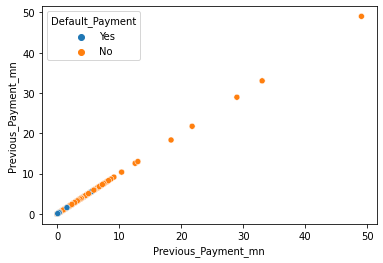

In [20]:
sns.scatterplot(data=df, x=df.Previous_Payment_mn, y=df.Previous_Payment_mn, hue=df.Default_Payment)

<AxesSubplot:xlabel='Age_Years', ylabel='Age_Years'>

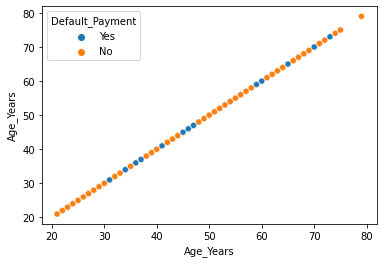

In [21]:
sns.scatterplot(data=df, x=df.Age_Years, y=df.Age_Years, hue = df.Default_Payment)

In [22]:
df.Gender = df.Gender.astype(str)

In [23]:
df["Gender"].replace({"1": "Male", "2": "Female"}, inplace=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

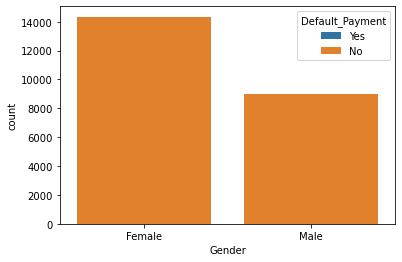

In [24]:
sns.countplot(data=df, x=df.Gender, hue = df.Default_Payment, dodge = False)

From the above plot, we see a large number of female defaulters as compared to male.

Given in the data description Academic_Qualification:	
    1.Undergraduate,   
    2.Graduate,   
    3.Postgraduate,   
    4.Professional,   
    5.Others,   
    6.Unknown								  
We will convert the int dataype to object and replace these values.

In [25]:
df.Academic_Qualification = df.Academic_Qualification.astype(str)

In [26]:
df.Academic_Qualification.replace({"1":"UG","2":"G","3":"PG","4":"P","5":"Others","6":"U"}, inplace=True)

In [27]:
df.Academic_Qualification.value_counts()

G         14030
UG        10585
PG         4917
Others      280
P           123
U            65
Name: Academic_Qualification, dtype: int64

<AxesSubplot:xlabel='Academic_Qualification', ylabel='count'>

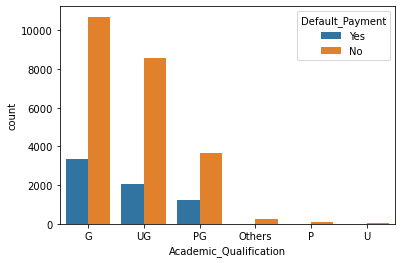

In [28]:
sns.countplot(data=df, x=df.Academic_Qualification, hue = df.Default_Payment)

From the above plot, we see that default seems to increase with decrease in academic qualification.

In [29]:
df.Marital = df.Marital.astype(str)

In [30]:
df.Marital.replace({"1":"M","2":"S","3":"O"}, inplace=True)

In [31]:
df.Marital.value_counts()

S    15964
M    13659
O      323
0       54
Name: Marital, dtype: int64

We need to remove the rows with observation as 0.

In [32]:
df.drop(df.loc[df['Marital']=="0"].index, inplace=True)

<AxesSubplot:xlabel='Marital', ylabel='count'>

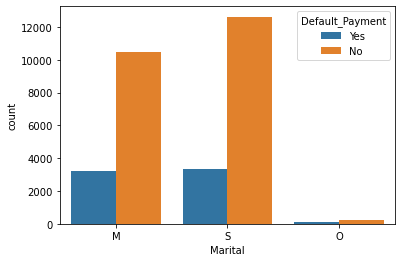

In [33]:
sns.countplot(data=df, x=df.Marital, hue=df.Default_Payment)

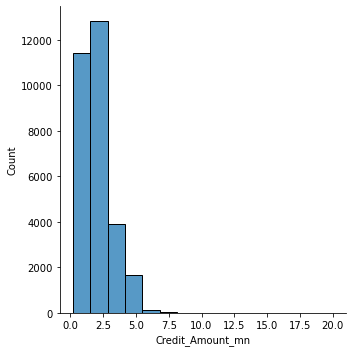

In [34]:
sns.displot(df, x=df.Credit_Amount_mn, bins=15, kde=False)

<AxesSubplot:xlabel='Default_Payment', ylabel='Credit_Amount_mn'>

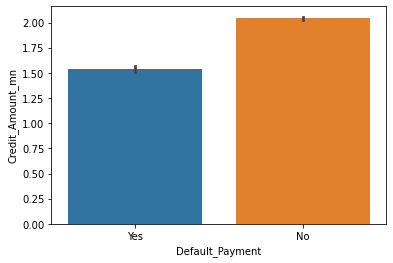

In [35]:
sns.barplot(data=df, x=df.Default_Payment, y=df.Credit_Amount_mn)

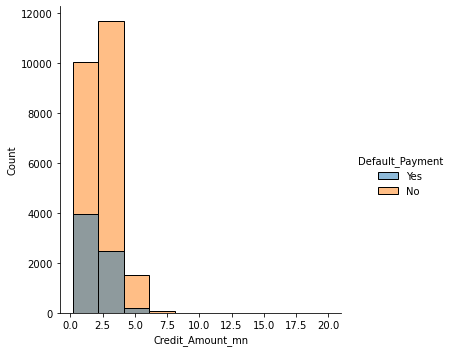

In [36]:
sns.displot(df, x="Credit_Amount_mn", hue="Default_Payment", bins = 10)

<AxesSubplot:>

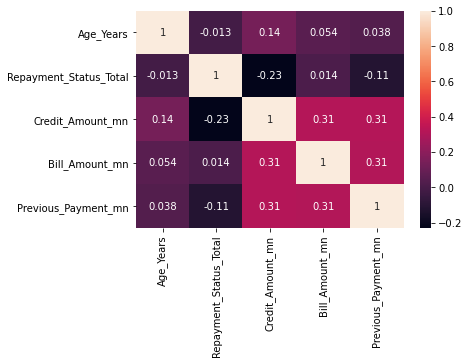

In [37]:
sns.heatmap(df.corr(),annot=True)

# Machine Learning Modelling

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29946 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  29946 non-null  object 
 1   Academic_Qualification  29946 non-null  object 
 2   Marital                 29946 non-null  object 
 3   Age_Years               29946 non-null  int64  
 4   Default_Payment         29946 non-null  object 
 5   Repayment_Status_Total  29946 non-null  int64  
 6   Credit_Amount_mn        29946 non-null  float64
 7   Bill_Amount_mn          29946 non-null  float64
 8   Previous_Payment_mn     29946 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Split input and target variables

In [39]:
X = df.drop("Default_Payment", axis=1)

In [40]:
X.tail()

,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Total,Credit_Amount_mn,Bill_Amount_mn,Previous_Payment_mn
29995,Male,PG,M,39,0,2.2,9.27249,0.43652
29996,Male,PG,S,43,0,2.5,0.24182,0.15601
29997,Male,G,S,37,9,0.3,0.69596,0.32400
29998,Male,PG,M,41,1,0.8,2.64510,1.59192
29999,Male,G,M,46,0,0.5,2.30784,0.10329


In [41]:
X = pd.get_dummies(X, drop_first=True)

In [42]:
y=df.Default_Payment

## Model Building

#### Train Test Split

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

#### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [45]:
log_pred = log_model.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,log_pred)

array([[6788,  240],
       [1478,  478]], dtype=int64)

In [47]:
accuracy_score(y_test,log_pred)

0.8087711487088157

#### DecisionTree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
dtree_pred = dtree.predict(x_test)

In [50]:
confusion_matrix(dtree_pred, y_test)

array([[5654, 1185],
       [1374,  771]], dtype=int64)

In [51]:
accuracy_score(dtree_pred, y_test)

0.715160284951024

#### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [57]:
rfc_pred = rfc.predict(x_test)

In [58]:
confusion_matrix(rfc_pred, y_test)

array([[6573, 1306],
       [ 455,  650]], dtype=int64)

In [59]:
accuracy_score(rfc_pred, y_test)

0.8039848619768477

From this exercise, we conclude that logistic regression model is the best fit for predicting this dataset.